In [ ]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
import pprint as pprint

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
characters = ["Aemon", "Aenys", "Alyn", "Arya", "Barristan", "Bran", "Catelyn", "Cersei", "Daenerys",
              "Edmure", "Elinor", "Gregor",  "Ilyn", "Jaime", "Janna", "Janos", "Jeor",
              "Jeyne", "Joffrey", "Jorah", "Kevan", "Lancel", "Luthor", "Lysa", "Maege", "Olyvar",
              "Petyr", "Pycelle", "Qyburn", "Rickard", "Robb", "Robert", "Roose", "Samwell",
              "Sandor", "Sansa", "Selyse", "Shireen", "Stannis", "Tommen", "Tyrion",
              "Tywin", "Vargo", "Varys"]
print(len(characters))

44


In [ ]:
x="/content/Martin_-George-R-R-A-Storm-of-Swords.txt"
with open(x, 'r') as f:
    print(f.read())

PROLOGUE



The day was grey and bitter cold, and the dogs would not take the scent.

The big black bitch had taken one sniff at the bear tracks, backed off, and skulked back to the pack with her tail between her legs. The dogs huddled together miserably on the riverbank as the wind snapped at them. Chett felt it too, biting through his layers of black wool and boiled leather. It was too bloody cold for man or beast, but here they were. His mouth twisted, and he could almost feel the boils that covered his cheeks and neck growing red and angry. I should be safe back at the Wall, tending the bloody ravens and making fires for old Maester Aemon. It was the bastard Jon Snow who had taken that from him, him and his fat friend Sam Tarly. It was their fault he was here, freezing his bloody balls off with a pack of hounds deep in the haunted forest.

“Seven hells.” He gave the leashes a hard yank to get the dogs’ attention. “Track, you bastards. That’s a bear print. You want some meat or no? 

In [ ]:
with open(x, 'r') as f:
  sentences = sent_tokenize(f.read())
print(len(sentences))

29474


In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

Aemon  Aenys  Alyn  Arya  Barristan  Bran  Catelyn  Cersei  \
Aemon          0      0     0     0          0     0        0       0   
Aenys          0      0     0     0          0     0        0       0   
Alyn           0      0     0     0          0     0        0       0   
Arya           0      0     0     0          0     0        0       0   
Barristan      0      0     0     0          0     0        0       0   

           Daenerys  Edmure  ...  Sandor  Sansa  Selyse  Shireen  Stannis  \
Aemon             0       0  ...       0      0       0        0        0   
Aenys             0       0  ...       0      0       0        0        0   
Alyn              0       0  ...       0      0       0        0        0   
Arya              0       0  ...       0      0       0        0        0   
Barristan         0       0  ...       0      0       0        0        0   

           Tommen  Tyrion  Tywin  Vargo  Varys  
Aemon           0       0      0      0      0  
Aenys           0       0      0      0      0  
Alyn            0       0      0      0      0  
Arya            0       0      0      0      0  
Barristan       0       0      0      0      0  

[5 rows x 44 columns]

In [ ]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

In [ ]:
char_df

Aemon  Aenys  Alyn  Arya  Barristan  Bran  Catelyn  Cersei  \
Aemon          0      0     2     0          2     2        0       0   
Aenys          0      0     0     0          0     0        0       0   
Alyn           2      0     0     0          2     0        0       0   
Arya           0      0     0     0          0    18        0       6   
Barristan      2      0     2     0          0     0        0       2   
Bran           2      0     0    18          0     0        6       0   
Catelyn        0      0     0     0          0     6        0       4   
Cersei         0      0     0     6          2     0        4       0   
Daenerys       0      0     0     0          0     0        0       0   
Edmure         0      0     0     0          0     2       18       0   
Elinor         0      0     0     0          0     0        0       0   
Gregor         0      0     0     0          0     0        2       2   
Ilyn           0      0     0     2          0     0        0      14   
Jaime          2      0     0     4          8     2       10      36   
Janna          0      0     0     0          0     0        0       0   
Janos          4      0     0     0          0     0        0       0   
Jeor           0      0     0     0          0     0        0       0   
Jeyne          0      0     0     0          0     2       10       0   
Joffrey        0      0     0     4          0     2        0      30   
Jorah          0      0     0     0          6     0        2       0   
Kevan          0      0     0     0          0     0        0       8   
Lancel         0      0     0     2          0     0        0       4   
Luthor         0      0     0     0          0     0        0       0   
Lysa           0      0     0     0          0     2        8       8   
Maege          0      0     0     0          0     0        8       0   
Olyvar         0      0     0     0          0     0        0       0   
Petyr          0      0     0     0          0     0        6       0   
Pycelle        0      0     0     0          0     0        0       8   
Qyburn         0      0     0     0          0     0        0       0   
Rickard        0      0     0     0          0     6        6       0   
Robb           2      0     0    18          2    16       44       2   
Robert         4      0     0     6          2     4        0      12   
Roose          0      0     0     6          0     0        2       0   
Samwell        2      0     0     0          0     0        0       0   
Sandor         0      0     0    12          0     0        0       2   
Sansa          0      0     0    30          0    16        6      20   
Selyse         0      0     0     0          0     0        0       0   
Shireen        0      0     0     0          0     0        0       0   
Stannis        0      0     0     0          0     0        4       2   
Tommen         0      0     0     2          0     2        0       4   
Tyrion         0      0     0     2          0     2        2      50   
Tywin          0      0     0     2          0     0        0      16   
Vargo          0      2     0     2          0     0        0       0   
Varys          0      0     0     2          2     0        0      10   

           Daenerys  Edmure  ...  Sandor  Sansa  Selyse  Shireen  Stannis  \
Aemon             0       0  ...       0      0       0        0        0   
Aenys             0       0  ...       0      0       0        0        0   
Alyn              0       0  ...       0      0       0        0        0   
Arya              0       0  ...      12     30       0        0        0   
Barristan         0       0  ...       0      0       0        0        0   
Bran              0       2  ...       0     16       0        0        0   
Catelyn           0      18  ...       0      6       0        0        4   
Cersei            0       0  ...       2     20       0        0        2   
Daenerys          0       0  ...

In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 44
Nodes: ['Aemon', 'Aenys', 'Alyn', 'Arya', 'Barristan', 'Bran', 'Catelyn', 'Cersei', 'Daenerys', 'Edmure', 'Elinor', 'Gregor', 'Ilyn', 'Jaime', 'Janna', 'Janos', 'Jeor', 'Jeyne', 'Joffrey', 'Jorah', 'Kevan', 'Lancel', 'Luthor', 'Lysa', 'Maege', 'Olyvar', 'Petyr', 'Pycelle', 'Qyburn', 'Rickard', 'Robb', 'Robert', 'Roose', 'Samwell', 'Sandor', 'Sansa', 'Selyse', 'Shireen', 'Stannis', 'Tommen', 'Tyrion', 'Tywin', 'Vargo', 'Varys']

Number of edges in the graph: 210
Edges: [('Aemon', 'Alyn', {'weight': 2}), ('Aemon', 'Barristan', {'weight': 2}), ('Aemon', 'Bran', {'weight': 2}), ('Aemon', 'Jaime', {'weight': 2}), ('Aemon', 'Janos', {'weight': 4}), ('Aemon', 'Robb', {'weight': 2}), ('Aemon', 'Robert', {'weight': 4}), ('Aemon', 'Samwell', {'weight': 2}), ('Aenys', 'Vargo', {'weight': 2}), ('Alyn', 'Barristan', {'weight': 2}), ('Arya', 'Bran', {'weight': 18}), ('Arya', 'Cersei', {'weight': 6}), ('Arya', 'Ilyn', {'weight': 2}), ('Arya', 'Jaime', {'weight': 4}), 

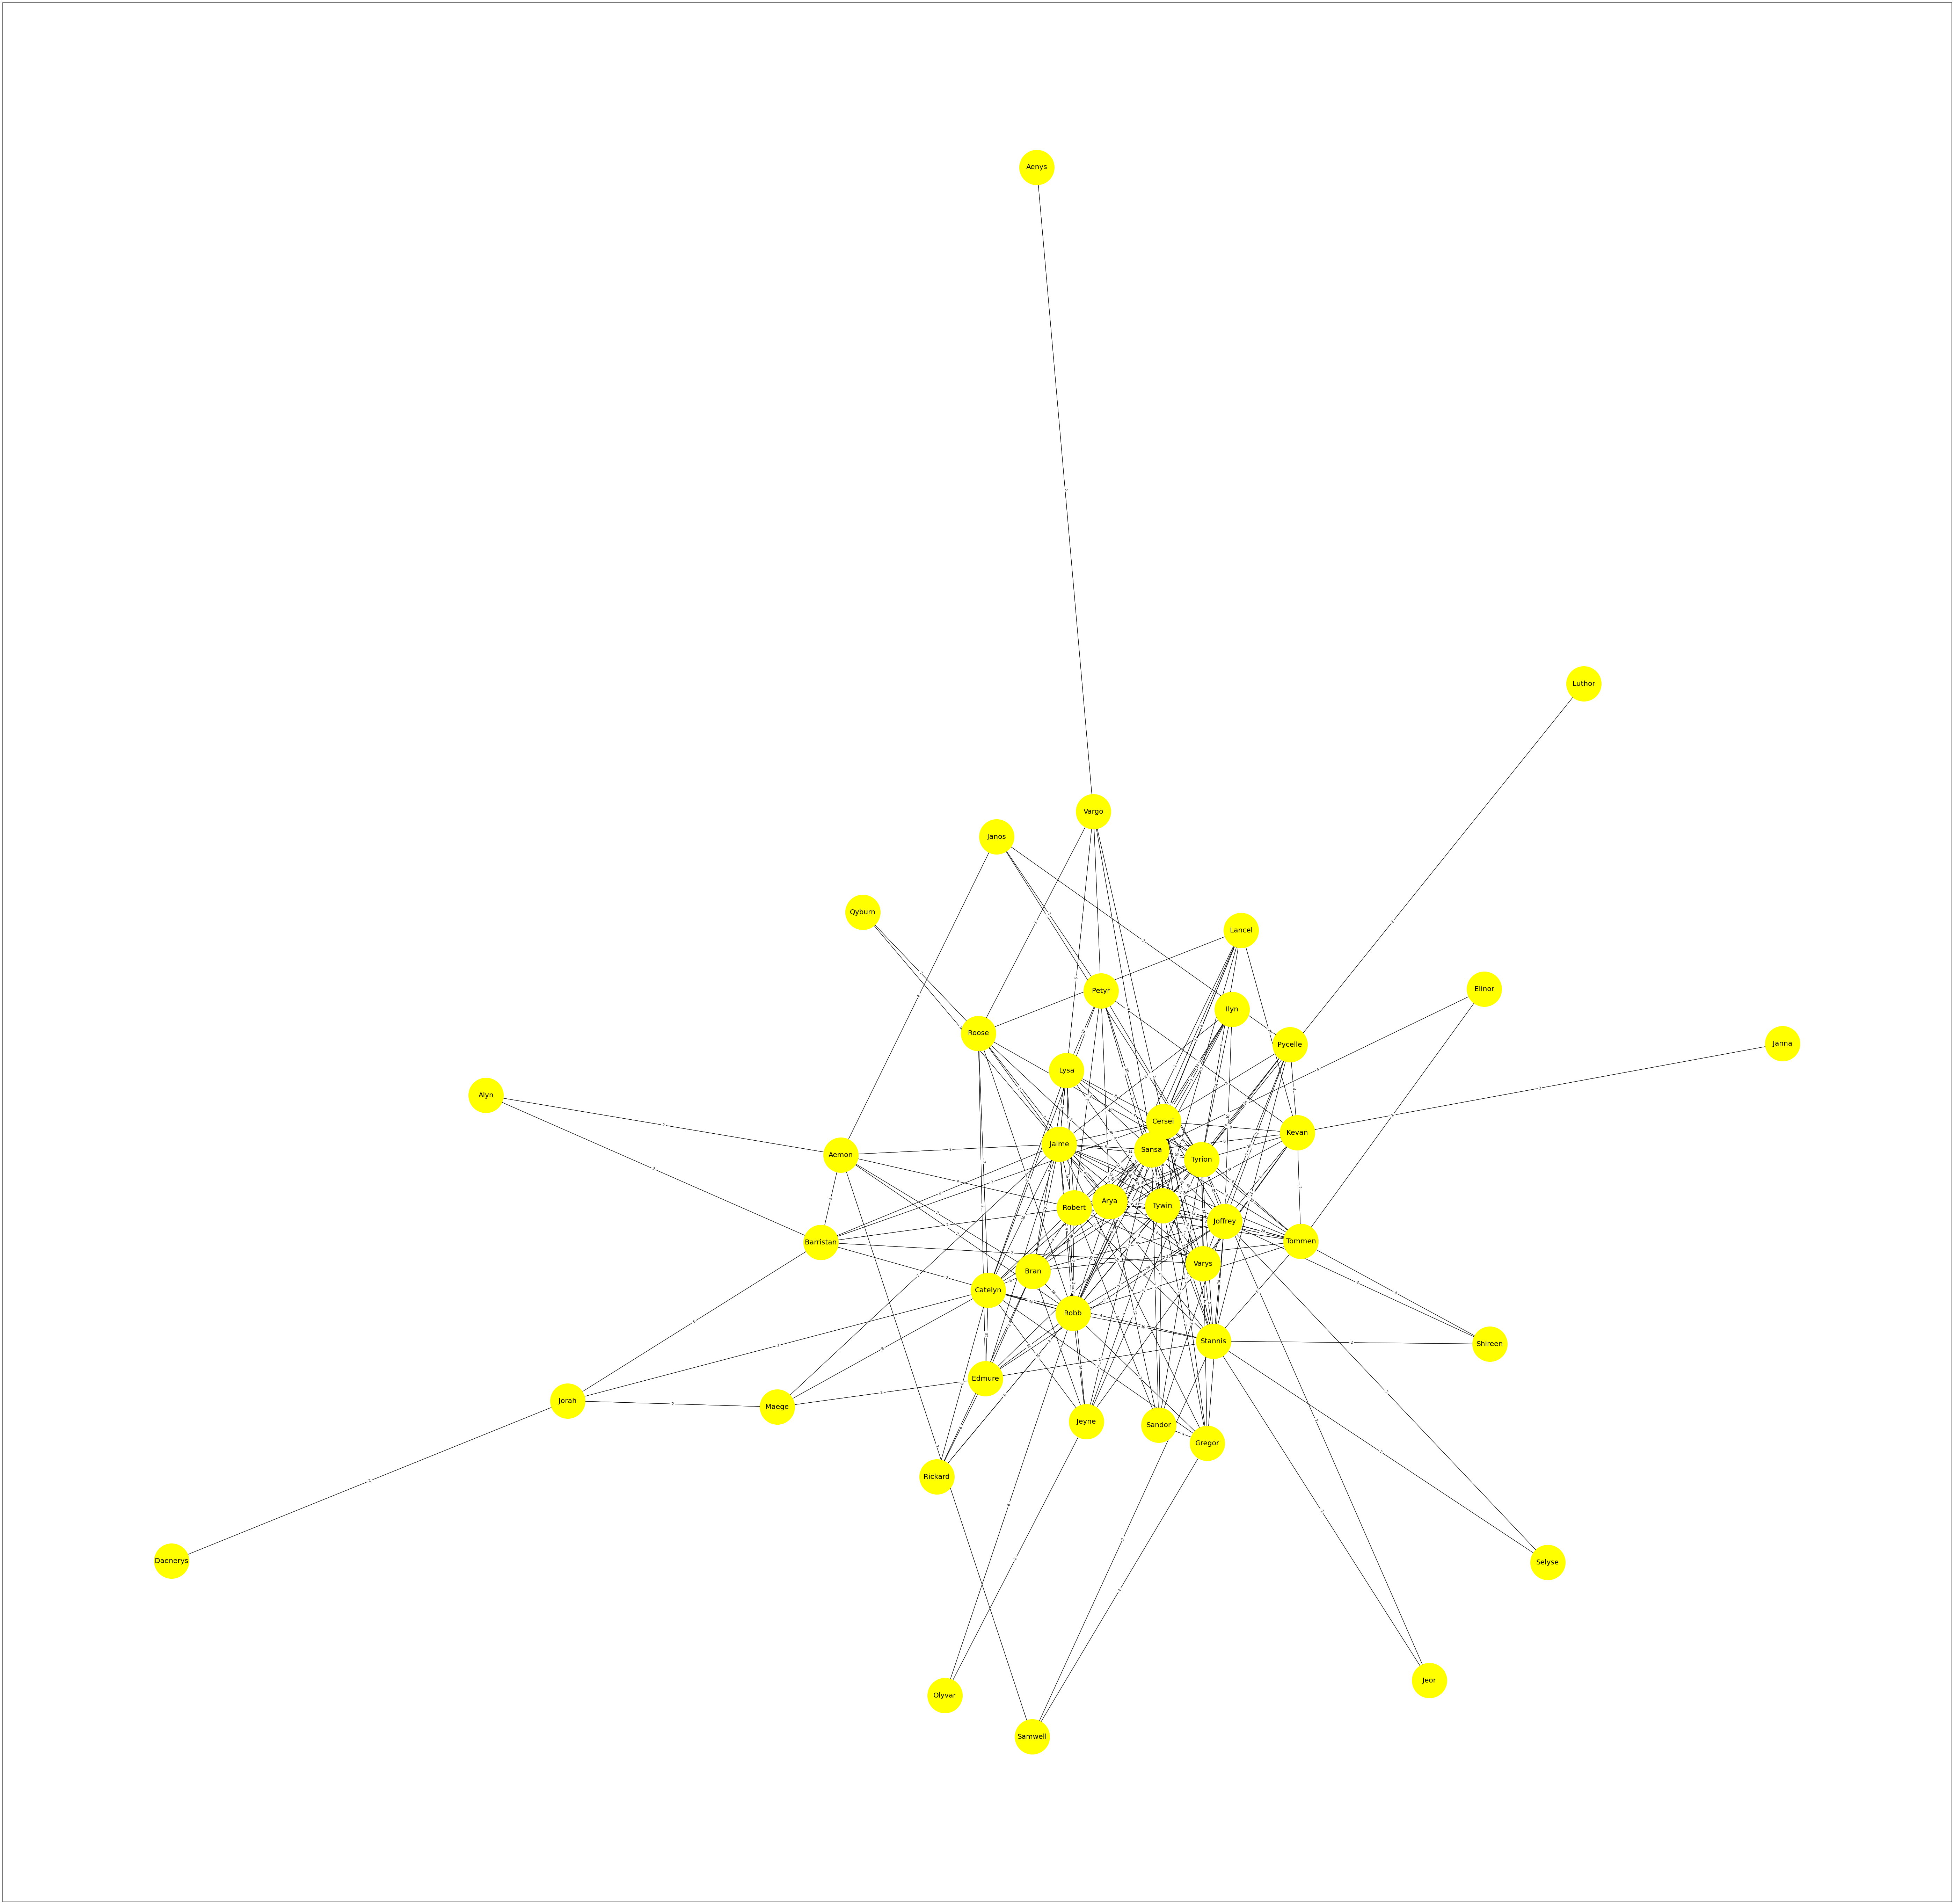

In [ ]:
plt.figure(figsize=(100,100))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 10000, font_size=20, node_color="yellow")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.savefig("Graph.png", format="PNG")
plt.show()

In [ ]:
max(G, key=G.degree)

'Tyrion'

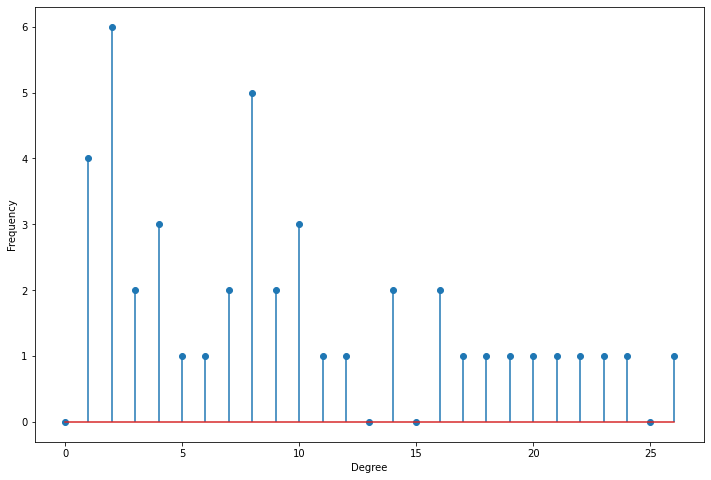

In [ ]:
degree_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.figure(figsize=(12, 8))
# https://pythontic.com/visualization/charts/stem%20plot
plt.stem(degree_freq)
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

In [ ]:
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())

c_eigenvector = nx.eigenvector_centrality(G)
c_eigenvector = list(c_eigenvector.values())

c_closeness = nx.closeness_centrality(G)
c_closeness = list(c_closeness.values())

c_betweenness = nx.betweenness_centrality(G)
c_betweenness = list(c_betweenness.values())

1c

Text(0.5, 1.0, 'Betweenness Centrality')

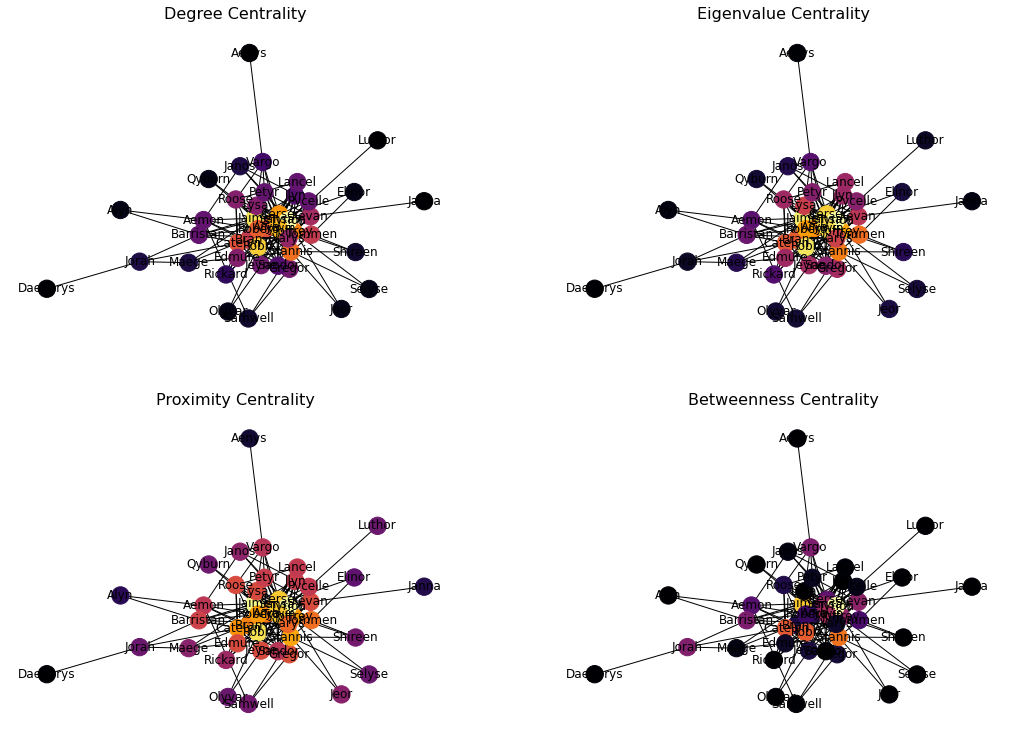

In [ ]:
plt.figure(figsize=(18, 13))
# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)
# Eigenvalue Centrality
plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)
# Closeness Centrality
plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Proximity Centrality', size=16)
# Betweenness Centrality
plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)

1d

In [ ]:
# GLOBAL CLUSTERING COEFFICIENT - The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed)
print(nx.average_clustering(G))

0.5760400431199145


In [ ]:
# LOCAL CLUSTERING COEFFICIENT - The local clustering coefficient of a vertex (node) in a graph quantifies how close its neighbours are to being a clique (complete graph)
nx.clustering(G)

{'Aemon': 0.35714285714285715,
 'Aenys': 0,
 'Alyn': 1.0,
 'Arya': 0.6083333333333333,
 'Barristan': 0.4642857142857143,
 'Bran': 0.5824175824175825,
 'Catelyn': 0.425,
 'Cersei': 0.5421052631578948,
 'Daenerys': 0,
 'Edmure': 0.6,
 'Elinor': 1.0,
 'Gregor': 0.6111111111111112,
 'Ilyn': 1.0,
 'Jaime': 0.42391304347826086,
 'Janna': 0,
 'Janos': 0.3333333333333333,
 'Jeor': 1.0,
 'Jeyne': 0.6388888888888888,
 'Joffrey': 0.5029239766081871,
 'Jorah': 0.16666666666666666,
 'Kevan': 0.5151515151515151,
 'Lancel': 0.8214285714285714,
 'Luthor': 0,
 'Lysa': 0.8222222222222222,
 'Maege': 0.6666666666666666,
 'Olyvar': 1.0,
 'Petyr': 0.6071428571428571,
 'Pycelle': 0.7142857142857143,
 'Qyburn': 1.0,
 'Rickard': 0.8,
 'Robb': 0.44664031620553357,
 'Robert': 0.6029411764705882,
 'Roose': 0.5555555555555556,
 'Samwell': 0,
 'Sandor': 0.8571428571428571,
 'Sansa': 0.5190476190476191,
 'Selyse': 1.0,
 'Shireen': 1.0,
 'Stannis': 0.4117647058823529,
 'Tommen': 0.6483516483516484,
 'Tyrion': 0.4,
 '

Community Detection - K Clique using percolation method

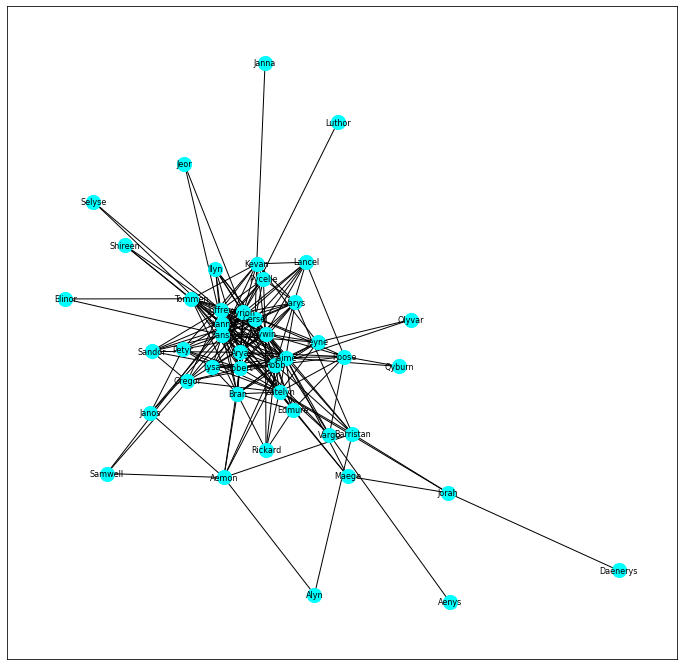

In [ ]:
#DETECTING COMMUNITIES

#Clique Percolation Method

plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

In [ ]:
# To search for all maximal cliques in a graph.
list(nx.find_cliques(G))


[['Shireen', 'Tommen', 'Joffrey', 'Stannis'],
 ['Vargo', 'Aenys'],
 ['Vargo', 'Jaime', 'Tywin', 'Arya', 'Roose'],
 ['Vargo', 'Jaime', 'Tywin', 'Stannis'],
 ['Jorah', 'Barristan'],
 ['Jorah', 'Daenerys'],
 ['Jorah', 'Catelyn', 'Maege'],
 ['Aemon', 'Bran', 'Robb', 'Robert', 'Jaime'],
 ['Aemon', 'Barristan', 'Alyn'],
 ['Aemon', 'Barristan', 'Robb', 'Robert', 'Jaime'],
 ['Aemon', 'Samwell'],
 ['Aemon', 'Janos'],
 ['Maege', 'Edmure', 'Jaime', 'Catelyn'],
 ['Samwell', 'Stannis'],
 ['Samwell', 'Gregor'],
 ['Elinor', 'Sansa', 'Tommen'],
 ['Barristan', 'Cersei', 'Robert', 'Jaime', 'Robb'],
 ['Barristan', 'Cersei', 'Robert', 'Jaime', 'Varys'],
 ['Olyvar', 'Robb', 'Jeyne'],
 ['Selyse', 'Joffrey', 'Stannis'],
 ['Edmure', 'Robb', 'Rickard', 'Bran', 'Catelyn'],
 ['Edmure', 'Robb', 'Rickard', 'Tywin'],
 ['Edmure', 'Robb', 'Jaime', 'Roose', 'Tywin'],
 ['Edmure', 'Robb', 'Jaime', 'Roose', 'Catelyn'],
 ['Edmure', 'Robb', 'Jaime', 'Joffrey', 'Bran'],
 ['Edmure', 'Robb', 'Jaime', 'Joffrey', 'Tywin', 'Stan

In [ ]:
# Finds the maximal cliques and treats these as nodes.
# The nodes are connected if they have common members in the original graph.
synthetic = nx.make_max_clique_graph(G)
print(synthetic.edges())

[(0, 3), (0, 13), (0, 15), (0, 19), (0, 24), (0, 25), (0, 27), (0, 33), (0, 34), (0, 35), (0, 40), (0, 41), (0, 42), (0, 43), (0, 46), (0, 47), (0, 49), (0, 50), (0, 59), (0, 63), (0, 65), (1, 2), (1, 3), (2, 3), (2, 7), (2, 9), (2, 12), (2, 16), (2, 17), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 32), (2, 33), (2, 34), (2, 35), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 51), (2, 52), (2, 53), (2, 54), (2, 56), (2, 57), (2, 58), (2, 60), (2, 61), (2, 62), (2, 63), (2, 64), (3, 7), (3, 9), (3, 12), (3, 13), (3, 16), (3, 17), (3, 19), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 28), (3, 32), (3, 33), (3, 34), (3, 35), (3, 37), (3, 38), (3, 39), (3, 40), (3, 41), (3, 42), (3, 43), (3, 44), (3, 45), (3, 46), (3, 47), (3, 48), (3, 50), (3, 51), (3, 52), (3, 53), (3, 54), (3, 56), (3, 57), (3, 58), (3, 59), (3, 60), (3, 61), (3, 62), (3, 63), (3, 64),

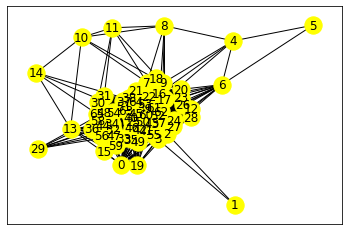

In [ ]:
nx.draw_networkx(synthetic,node_color='yellow')

In [ ]:
#K-clique Community - A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.

from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

#A frozenset is an immutable version of a Python set. Because of its immutability, it can be used as key in a dictionary, but it can be cast to a set, if any modifications are necessary.

[frozenset({'Cersei', 'Arya', 'Sansa', 'Joffrey', 'Jaime', 'Tyrion', 'Tommen', 'Robb', 'Bran', 'Tywin', 'Robert', 'Stannis'})]


In [ ]:
print(len(list(c)))

1


In [ ]:
print(list(c[0]))

['Cersei', 'Arya', 'Sansa', 'Joffrey', 'Jaime', 'Tyrion', 'Tommen', 'Robb', 'Bran', 'Tywin', 'Robert', 'Stannis']


Community Detection - Girvan Newman

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
import community
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Aemon',
  'Alyn',
  'Arya',
  'Barristan',
  'Bran',
  'Catelyn',
  'Cersei',
  'Edmure',
  'Elinor',
  'Gregor',
  'Ilyn',
  'Jaime',
  'Janna',
  'Janos',
  'Jeor',
  'Jeyne',
  'Joffrey',
  'Kevan',
  'Lancel',
  'Luthor',
  'Lysa',
  'Maege',
  'Olyvar',
  'Petyr',
  'Pycelle',
  'Qyburn',
  'Rickard',
  'Robb',
  'Robert',
  'Roose',
  'Samwell',
  'Sandor',
  'Sansa',
  'Selyse',
  'Shireen',
  'Stannis',
  'Tommen',
  'Tyrion',
  'Tywin',
  'Vargo',
  'Varys'],
 ['Aenys'],
 ['Daenerys', 'Jorah']]

Community Detection - Louvain

In [ ]:
import community.community_louvain as community_louvain
#first compute the best partition
part = community_louvain.best_partition(G)
print(part)
communities = {}
for p in part.keys():
  key = part[p]
  if key in communities:
    communities[key].append(p)
  else:
    communities[key] = [p]

from itertools import zip_longest

# zip all the values together
zl = list(zip_longest(*communities.values()))

# create dataframe
comm_df = pd.DataFrame(zl, columns=communities.keys())
pprint.pprint(communities)
comm_df

{'Aemon': 0, 'Aenys': 0, 'Alyn': 0, 'Arya': 2, 'Barristan': 0, 'Bran': 2, 'Catelyn': 2, 'Cersei': 1, 'Daenerys': 0, 'Edmure': 2, 'Elinor': 1, 'Gregor': 2, 'Ilyn': 1, 'Jaime': 0, 'Janna': 1, 'Janos': 0, 'Jeor': 0, 'Jeyne': 2, 'Joffrey': 1, 'Jorah': 0, 'Kevan': 1, 'Lancel': 1, 'Luthor': 1, 'Lysa': 1, 'Maege': 2, 'Olyvar': 2, 'Petyr': 1, 'Pycelle': 1, 'Qyburn': 0, 'Rickard': 2, 'Robb': 2, 'Robert': 0, 'Roose': 2, 'Samwell': 0, 'Sandor': 2, 'Sansa': 1, 'Selyse': 0, 'Shireen': 1, 'Stannis': 0, 'Tommen': 1, 'Tyrion': 1, 'Tywin': 0, 'Vargo': 0, 'Varys': 1}
{0: ['Aemon',
     'Aenys',
     'Alyn',
     'Barristan',
     'Daenerys',
     'Jaime',
     'Janos',
     'Jeor',
     'Jorah',
     'Qyburn',
     'Robert',
     'Samwell',
     'Selyse',
     'Stannis',
     'Tywin',
     'Vargo'],
 1: ['Cersei',
     'Elinor',
     'Ilyn',
     'Janna',
     'Joffrey',
     'Kevan',
     'Lancel',
     'Luthor',
     'Lysa',
     'Petyr',
     'Pycelle',
     'Sansa',
     'Shireen',
     'Tommen',
  

0        2        1
0       Aemon     Arya   Cersei
1       Aenys     Bran   Elinor
2        Alyn  Catelyn     Ilyn
3   Barristan   Edmure    Janna
4    Daenerys   Gregor  Joffrey
5       Jaime    Jeyne    Kevan
6       Janos    Maege   Lancel
7        Jeor   Olyvar   Luthor
8       Jorah  Rickard     Lysa
9      Qyburn     Robb    Petyr
10     Robert    Roose  Pycelle
11    Samwell   Sandor    Sansa
12     Selyse     None  Shireen
13    Stannis     None   Tommen
14      Tywin     None   Tyrion
15      Vargo     None    Varys

In [ ]:

print(community_louvain.modularity(part, G))

0.24682095248399347


In [ ]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[0, 2, 1]
[(0, 0), (0, 2), (0, 1), (2, 2), (2, 1), (1, 1)]


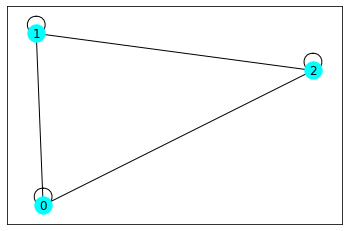

In [ ]:
nx.draw_networkx(induced,node_color='cyan')

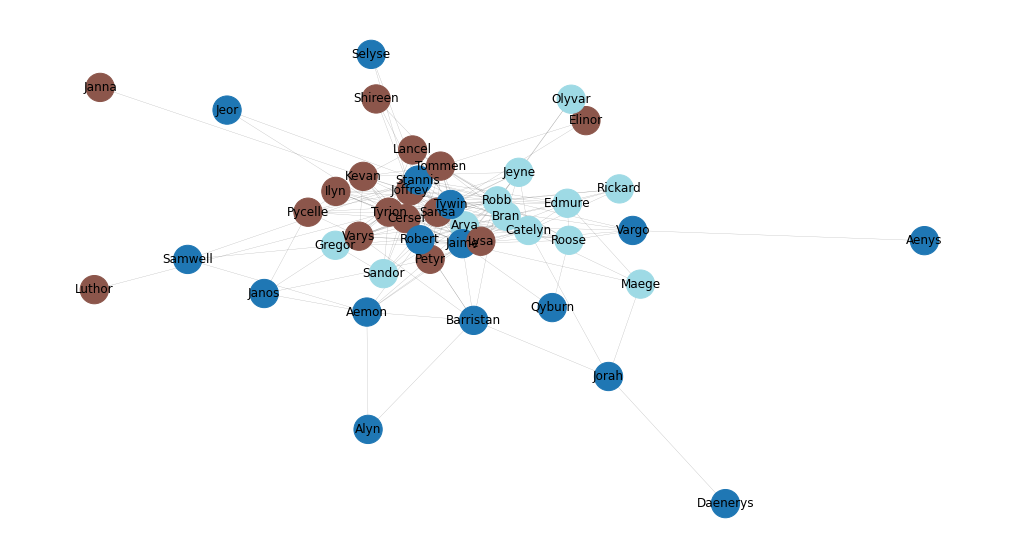

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(18, 10))
plt.axis('off')
# Use matplotlib colormap : https://matplotlib.org/gallery/color/colormap_reference.html
nx.draw_networkx_nodes(G, pos, part.keys(), node_size=800, cmap=plt.cm.tab20, node_color=list(part.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.3)
nx.draw_networkx_labels(G, pos=pos)
plt.show(G)


Degree Distribution

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


Nodes:  44
Edges:  210
Average degree:  4.7727272727272725


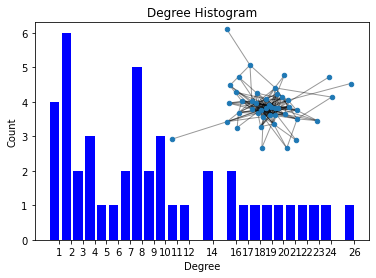

In [ ]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

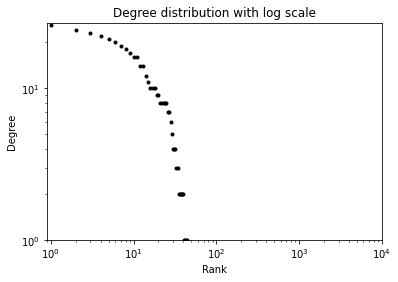

In [ ]:
degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")

Avg. Shortest Path

In [ ]:
print(nx.average_shortest_path_length(G))

2.080338266384778


In [ ]:
#Size of Largest Component
largest = max(nx.connected_components(G), key=len)
len(largest)


44

Equivalent generative models

In [ ]:
nodes=G.number_of_nodes()
nodes

44

In [ ]:
#calculate average degree to use with random graph models

degree_list = list(nx.degree(G))
print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:44]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

[('Aemon', 8), ('Aenys', 1), ('Alyn', 2), ('Arya', 16), ('Barristan', 8), ('Bran', 14), ('Catelyn', 16), ('Cersei', 20), ('Daenerys', 1), ('Edmure', 10), ('Elinor', 2), ('Gregor', 9), ('Ilyn', 7), ('Jaime', 24), ('Janna', 1), ('Janos', 4), ('Jeor', 2), ('Jeyne', 9), ('Joffrey', 19), ('Jorah', 4), ('Kevan', 12), ('Lancel', 8), ('Luthor', 1), ('Lysa', 10), ('Maege', 4), ('Olyvar', 2), ('Petyr', 8), ('Pycelle', 8), ('Qyburn', 2), ('Rickard', 5), ('Robb', 23), ('Robert', 17), ('Roose', 10), ('Samwell', 3), ('Sandor', 7), ('Sansa', 21), ('Selyse', 2), ('Shireen', 3), ('Stannis', 18), ('Tommen', 14), ('Tyrion', 26), ('Tywin', 22), ('Vargo', 6), ('Varys', 11)]
Node  Aemon  : Degree is  8
Node  Aenys  : Degree is  1
Node  Alyn  : Degree is  2
Node  Arya  : Degree is  16
Node  Barristan  : Degree is  8
Node  Bran  : Degree is  14
Node  Catelyn  : Degree is  16
Node  Cersei  : Degree is  20
Node  Daenerys  : Degree is  1
Node  Edmure  : Degree is  10
Node  Elinor  : Degree is  2
Node  Gregor  : 

9.545454545454545

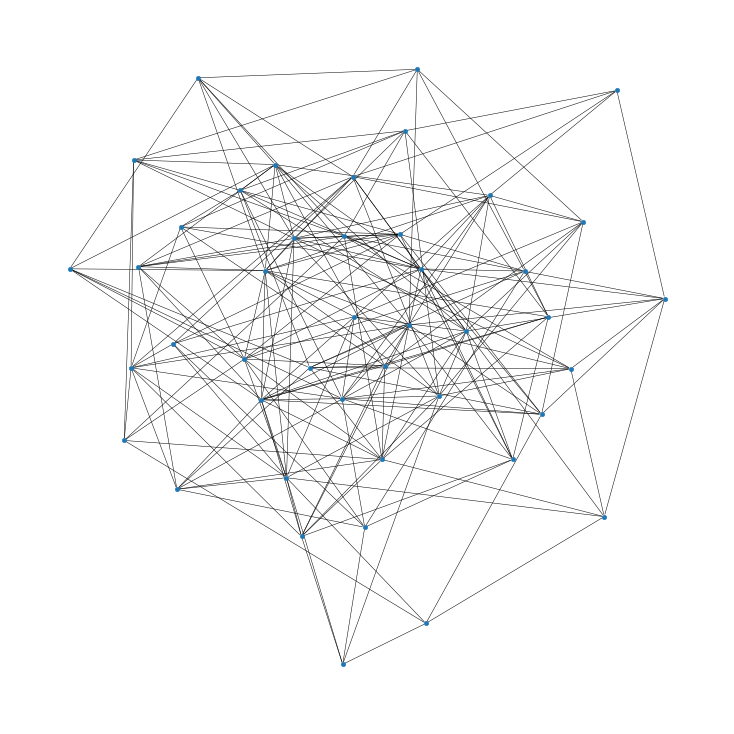

In [ ]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

NetworkXError: ignored

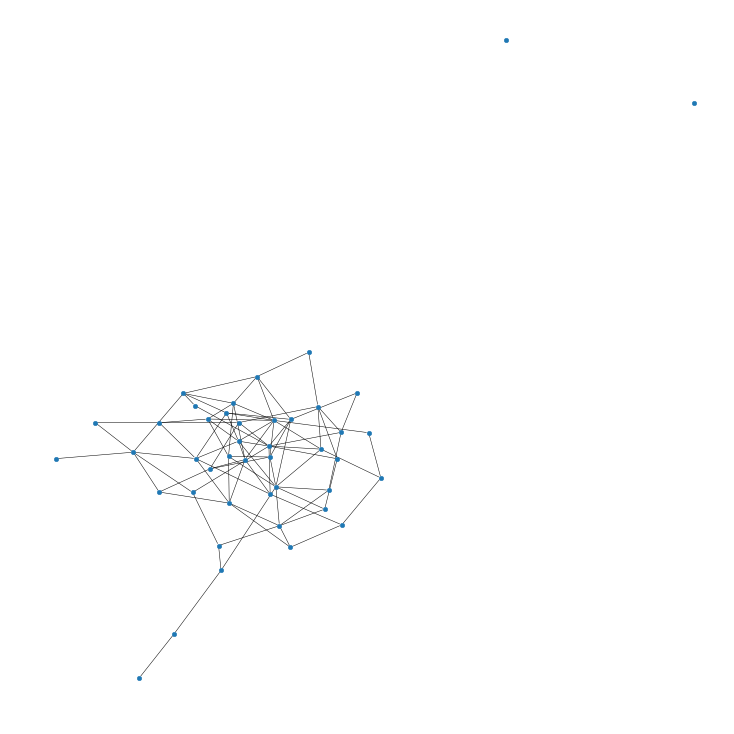

In [ ]:
#Make random graph
G3 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1
fig = plt.figure(figsize =(10 ,10))
nx.draw(G3, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
print(nx.average_shortest_path_length(G3))
plt.show()

In [ ]:
#Newman watts strogatz graph

neighbours=5

H1 = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H1, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
print(nx.average_shortest_path_length(H1))
plt.show()

In [ ]:
#Generative model
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [ ]:
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)


In [ ]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]

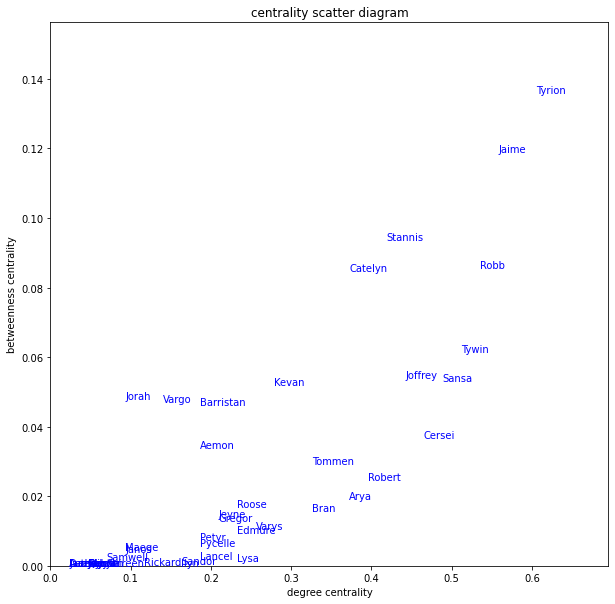

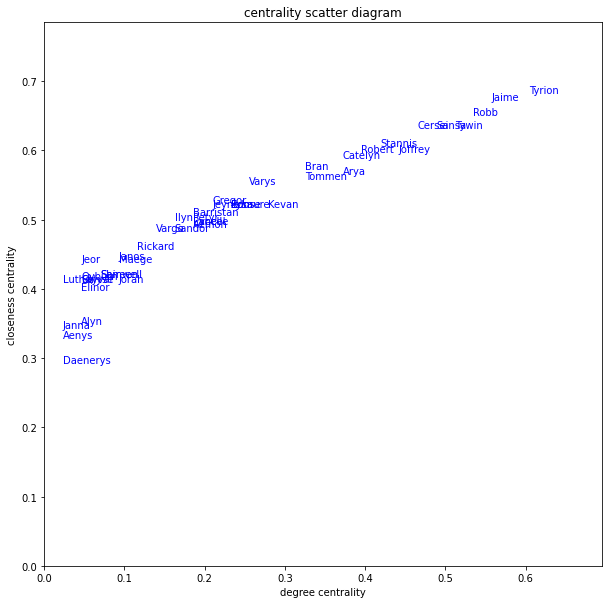

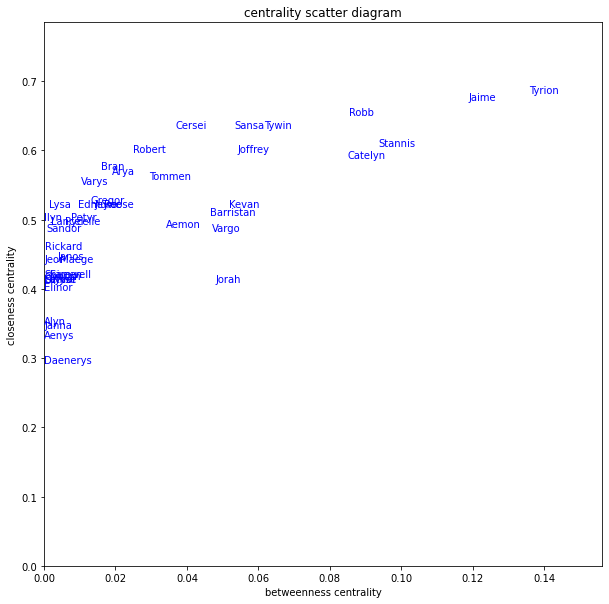

In [ ]:
# Draw centrality scatter
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
#centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)